### Importing important libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error
%matplotlib inline

### Data Reading 

In [46]:
data=pd.read_csv("indian_liver_patient.csv")

In [47]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Performing Basic EDA

<AxesSubplot:>

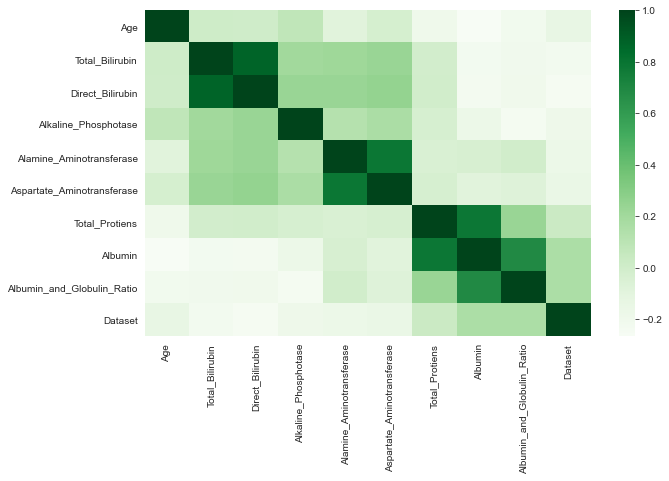

In [48]:
plot=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap="Greens")

##### "Values such as "Total_Bilirubin and Direct_Bilirubin" , "Alamine_Aminotransferase and Aspartate_Aminotransferase" , " Total_Protien and Albumin and Albumin_and_Globulin_Ratio" are observed to be related to each-other"

In [49]:
infected=data[data['Dataset']==1]
#person who are suffering some kind of liver- disease.

In [50]:
infected.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


C:\Users\tripathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE'>

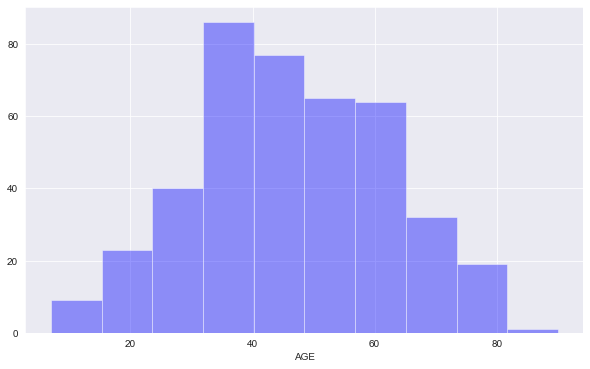

In [51]:
sns.set_style("darkgrid")
figure=plt.figure(figsize=(10,6))
sns.distplot(infected["Age"],bins=10,kde=False,axlabel='AGE',color="blue")


##### "People in the age of 30-40 years are the one who are most infected with the liver disorder"

<AxesSubplot:xlabel='Gender', ylabel='count'>

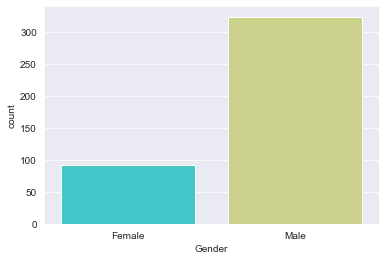

In [52]:
sns.countplot(x='Gender',data=infected,palette='rainbow')

##### "Men are more infected in comparison of women"

### Data PreProcessing

In [69]:
#converting the male / female text data point to numerical for better adaptibility of the models and easy to scale the model
for i in range(583):
    if data.iloc[i,1]=='Male':
        data.iloc[i,1]=0
    else:
        data.iloc[i,1]=1
        
data['Gender'].unique()

array([1], dtype=object)

In [63]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [64]:
for i in range(583):
    if data.iloc[i,10]==2:
        data.iloc[i,10]=0
        
data['Dataset'].unique()
#converting the dataset==2 to dataset==0 for uninfected definition 

array([1, 0], dtype=int64)

In [65]:
#cheaking for the null values
for i in range(11):
    print(sum(data.iloc[:,i].isnull()))    

0
0
0
0
0
0
0
0
0
0
0


In [66]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [67]:
sum(data['Albumin_and_Globulin_Ratio'].isnull())
#handeled the null values succesfully!

0

### Scaling the data for training the Models

In [68]:
scaler = StandardScaler()
scaler.fit(data.drop('Dataset',axis=1))
scaled_features = scaler.transform(data.drop('Dataset',axis=1))
data_scaled = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [70]:
X=data_scaled
y=data['Dataset']

### Spliting of the data in X_train and X_test set

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [74]:
y_test.value_counts()

1    128
0     47
Name: Dataset, dtype: int64

##### Support Vector Machine Algo (SVM)

In [108]:
model1=SVC()

In [109]:
#hyper-parameter tuning
param_grid = {'C': [0.1,1, 10,50,100,200,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.704, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.704, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.704, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.704, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.704, total=   0.0s
[CV] 

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.704, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.704, total=   0.0s
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] ........... C=50, gamma=1, kernel=rbf, score=0.695, total=   0.0s
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] ........... C=50, gamma=1, kernel=rbf, score=0.744, total=   0.0s
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] ........... C=50, gamma=1, kernel=rbf, score=0.695, total=   0.0s
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] ........... C=50, gamma=1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] ........... C=50, gamma=1, kernel=rbf, score=0.704, total=   0.0s
[CV] C=50, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] ....... C=200, gamma=0.01, kernel=rbf, score=0.659, total=   0.0s
[CV] C=200, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=200, gamma=0.01, kernel=rbf, score=0.707, total=   0.0s
[CV] C=200, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=200, gamma=0.01, kernel=rbf, score=0.707, total=   0.0s
[CV] C=200, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=200, gamma=0.01, kernel=rbf, score=0.654, total=   0.0s
[CV] C=200, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=200, gamma=0.01, kernel=rbf, score=0.691, total=   0.0s
[CV] C=200, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=200, gamma=0.001, kernel=rbf, score=0.707, total=   0.0s
[CV] C=200, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=200, gamma=0.001, kernel=rbf, score=0.707, total=   0.0s
[CV] C=200, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    3.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 200, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [110]:
model1_predictions=grid.predict(X_test)

In [111]:
model1_acc=accuracy_score(y_test,model1_predictions)
model1_prec=precision_score(y_test,model1_predictions)
model1_rec=recall_score(y_test,model1_predictions)
model1_f1=f1_score(y_test,model1_predictions)
model1_mas=mean_absolute_error(y_test,model1_predictions)
model1_rms=np.sqrt(mean_squared_error(y_test,model1_predictions))
print(classification_report(y_test,model1_predictions))

              precision    recall  f1-score   support

           0       0.53      0.19      0.28        47
           1       0.76      0.94      0.84       128

    accuracy                           0.74       175
   macro avg       0.64      0.56      0.56       175
weighted avg       0.70      0.74      0.69       175



##### Logistic Regression Algo

In [112]:
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [113]:
model2_predictions=model2.predict(X_test)

In [114]:
model2_acc=accuracy_score(y_test,model2_predictions)
model2_prec=precision_score(y_test,model2_predictions)
model2_rec=recall_score(y_test,model2_predictions)
model2_f1=f1_score(y_test,model2_predictions)
model2_mas=mean_absolute_error(y_test,model2_predictions)
model2_rms=np.sqrt(mean_squared_error(y_test,model2_predictions))

In [115]:
print(classification_report(y_test,model2_predictions))

              precision    recall  f1-score   support

           0       0.45      0.21      0.29        47
           1       0.76      0.91      0.83       128

    accuracy                           0.72       175
   macro avg       0.61      0.56      0.56       175
weighted avg       0.68      0.72      0.68       175



#### Random Forest Classifier Algo

In [116]:
model3= RandomForestClassifier(n_estimators=600)
model3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [117]:
model3_predictions=model3.predict(X_test)
model3_acc=accuracy_score(y_test,model3_predictions)
model3_prec=precision_score(y_test,model3_predictions)
model3_rec=recall_score(y_test,model3_predictions)
model3_f1=f1_score(y_test,model3_predictions)
model3_mas=mean_absolute_error(y_test,model3_predictions)
model3_rms=np.sqrt(mean_squared_error(y_test,model3_predictions))
print(classification_report(y_test,model3_predictions))

              precision    recall  f1-score   support

           0       0.41      0.34      0.37        47
           1       0.77      0.82      0.80       128

    accuracy                           0.69       175
   macro avg       0.59      0.58      0.58       175
weighted avg       0.67      0.69      0.68       175



In [118]:
model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)

DecisionTreeClassifier()

In [119]:
model4_predictions=model4.predict(X_test)
model4_acc=accuracy_score(y_test,model4_predictions)
model4_prec=precision_score(y_test,model4_predictions)
model4_rec=recall_score(y_test,model4_predictions)
model4_f1=f1_score(y_test,model4_predictions)
model4_mas=mean_absolute_error(y_test,model4_predictions)
model4_rms=np.sqrt(mean_squared_error(y_test,model4_predictions))

In [120]:
print(classification_report(y_test,model4_predictions))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43        47
           1       0.79      0.79      0.79       128

    accuracy                           0.69       175
   macro avg       0.61      0.61      0.61       175
weighted avg       0.69      0.69      0.69       175



### K-Nearest Neighbour Algo (kNN)

In [121]:
error_rate = []

for i in range(1,40):
    
    model5 = KNeighborsClassifier(n_neighbors=i)
    model5.fit(X_train,y_train)
    pred_i = model5.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

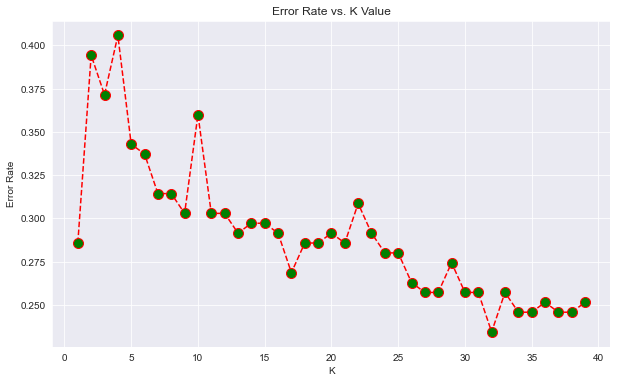

In [122]:
#Hyper-parameter tunining

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [123]:
error_rate[33]

0.24571428571428572

In [128]:
model5 = KNeighborsClassifier(n_neighbors=33)

model5.fit(X_train,y_train)
model5_predictions = model5.predict(X_test)

print('WITH K=36')
print('\n')
print(classification_report(y_test,model5_predictions))

WITH K=36


              precision    recall  f1-score   support

           0       0.62      0.11      0.18        47
           1       0.75      0.98      0.85       128

    accuracy                           0.74       175
   macro avg       0.69      0.54      0.51       175
weighted avg       0.72      0.74      0.67       175

0.6914285714285714


In [131]:
model5_acc=accuracy_score(y_test,model5_predictions)
model5_prec=precision_score(y_test,model5_predictions)
model5_rec=recall_score(y_test,model5_predictions)
model5_f1=f1_score(y_test,model5_predictions)
model5_mas=mean_absolute_error(y_test,model5_predictions)
model5_rms=np.sqrt(mean_squared_error(y_test,model5_predictions))

### Comparison between all the models(5) trained

In [136]:
dict1={'Machine Learning Algorithm':['Support Vector Machine','Logistic Regression','Random Forest Classifier','Decision Tree Classifier','K Nearest Neighbours']
   ,'Accuracy_Score':[model1_acc*100,model2_acc*100,model3_acc*100,model4_acc*100,model5_acc*100]
   ,'Precision_Score':[model1_prec*100,model2_prec*100,model3_prec*100,model4_prec*100,model5_prec*100]
   ,'Recall_Score':[model1_rec*100,model2_rec*100,model3_rec*100,model4_rec*100,model5_rec*100]
   ,'F1_Score':[model1_f1*100,model2_f1*100,model3_f1*100,model4_f1*100,model5_f1*100]
   ,'Mean_Absolute_Error':[model1_mas*100,model2_mas*100,model3_mas*100,model4_mas*100,model5_mas*100]
   ,'Root_Mean_Square_Error':[model1_rms*100,model2_rms*100,model3_rms*100,model4_rms*100,model5_rms*100]}

In [137]:
final=pd.DataFrame(dict1)

In [138]:
final.head()

,Machine Learning Algorithm,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,Mean_Absolute_Error,Root_Mean_Square_Error
0,Support Vector Machine,73.714286,75.949367,93.75000,83.916084,26.285714,51.269596
1,Logistic Regression,72.000000,75.816993,90.62500,82.562278,28.000000,52.915026
2,Random Forest Classifier,69.142857,77.205882,82.03125,79.545455,30.857143,55.549206
3,Decision Tree Classifier,69.142857,78.906250,78.90625,78.906250,30.857143,55.549206
4,K Nearest Neighbours,74.285714,74.850299,97.65625,84.745763,25.714286,50.709255


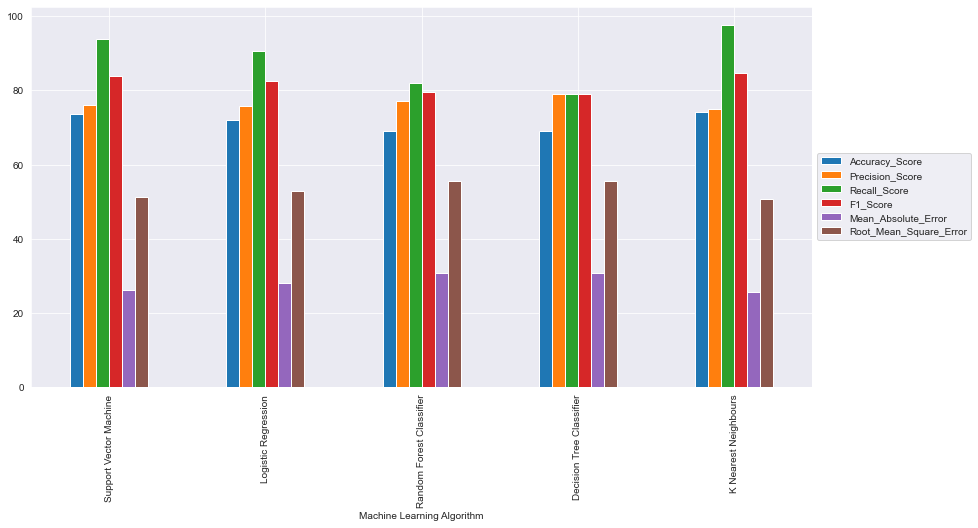

In [140]:
final.plot.bar(x='Machine Learning Algorithm',figsize=(14,7))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))